2020-03-31 09:23:18 
<p><b>In V2 of this jupyter notebook, for all non-bayesian models, I only added top 50 data points instead of 100</b> So, in the following experiments, I choose 100 data points to add at each round</p>

2020-03-20 17:15:06 

<font size="3"><b> Exprimental Setting </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. In most cases, I found other Kl scaling factor to be detrimental to MNIST data. In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Partial complete retraining:</b> To avoid classification error for both training and test creaping up after 10-15 epochs. I <font color="red">retrain the model from scratch after every 13 epochs</font>. This is why you see an increase in the classification error after every 13th epoch. Albeit, this is another important step.</li>
    <li><b>Number of MCMC samples</b>: 5</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.25</li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import os

In [2]:
plot_pth = 'McDropoutVsBayesianVariationRatio/'
class getMetric():

    def __init__(self, type, pth):
        self.files = [f for f in os.listdir(pth)]
        self.files = sorted(self.files, key=lambda x: int(x.split('round')[1].split('.csv')[0]))
        if type == 'accuracy':
            indx = 10
        # classification error
        self.metric = [1 - pd.read_csv(pth + f).iloc[indx][1] for f in self.files][:40]

def PlotGraph(figure_nam,data_locs,labels):
    metric_list = [getMetric('accuracy',pth).metric for pth in data_locs]
    rounds = range(len(metric_list[0]))
    colors = ['#9B59B6','#76D7C4','#F5B041','#E74C3C','#2C3E50']
    markers = ['o','o','o','^','^']

    font = {'family': 'Serif',
            'weight': 'normal',
            'size': 14}
    rc('font', **font)
    if not figure_nam:
        figure_nam = 'my_fig.png'
    plt.figure(num=1, figsize=(14, 7))
    ax = plt.axes()
    for i,m in enumerate(metric_list):
        ax.plot(rounds, m, marker=markers[i], color=colors[i], label=labels[i])

    ax.set_ylabel('classification error', fontsize=18)
    ax.set_xlabel(r'# samples ($\times 50$)', fontsize=18)
    ax.legend(loc=1, ncol=1, frameon=True)
    plt.savefig(plot_pth+figure_nam, orientation='portrait', bbox_inches='tight', dpi=300)

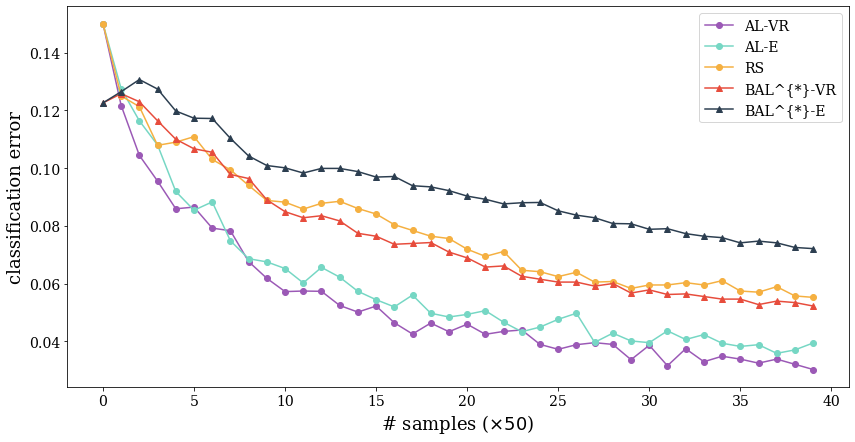

In [10]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results/active_mnist_retrain0_modified_test/'
pth_5 = '../results/random_mnist_retrain0_modified_test/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL^{*}-VR','BAL^{*}-E']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

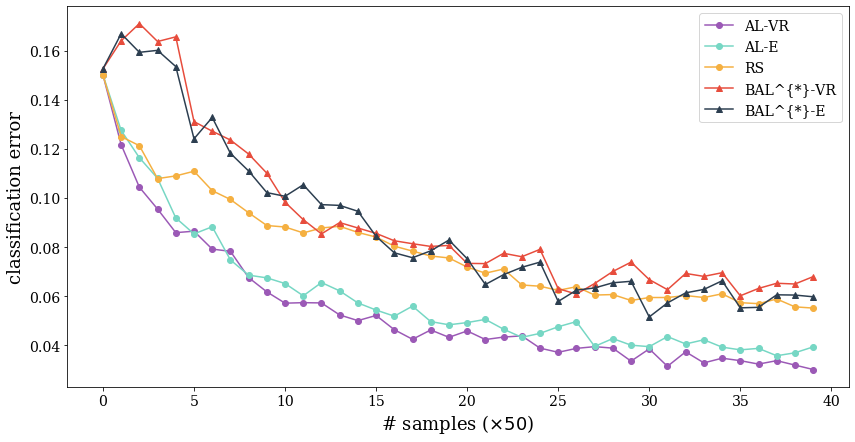

In [11]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results/Blenet300-100_mnist_isample500_e25_r41_ac1_Klreg-standard2_b32_mcmc5_netType-jeffrey_variation-ratio_retrain0/'
pth_5 = '../results/Blenet300-100_mnist_isample500_e25_r41_ac0_Klreg-standard2_b32_mcmc5_netType-jeffrey_variation-ratio_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL^{*}-VR','BAL^{*}-E']
f_name = 'fig_a'
PlotGraph(f_name,locs,labels)

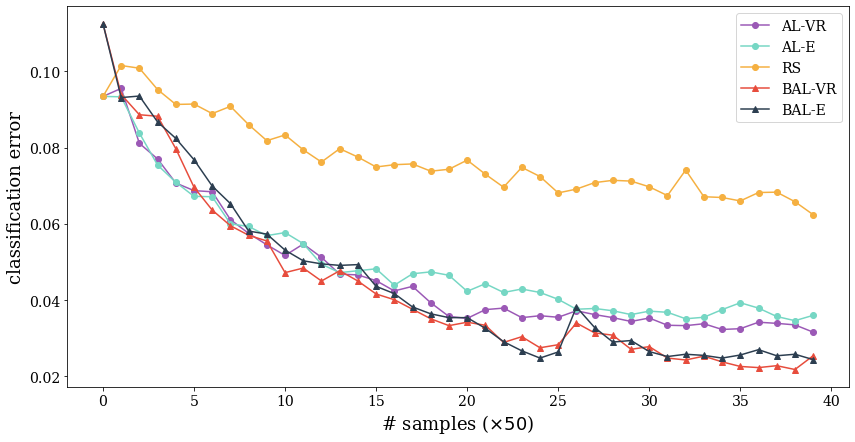

In [4]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_mnist_isample1000_e20_r40_ac0_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Blenet300-100_mnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc5_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_b'
PlotGraph(f_name,locs,labels)

<p>From the results, one can observe that the bayesian version of active learning performs better than the frequentist coutner part. We don't see any major difference in the first 10-15 rounds. However, the Bayesian active learning starts to outperform both AL-VR and AL-E after around 15th round. Consistent with the CVPR paper, the variation-ratio seems to be the best metric for uncertainty calculation. This is also in the case of bayesian NN.</p>

2020-03-30 18:11:59 
<h2 align="center">Fashion MNIST data</h2>

<font size="3"><b> Exprimental Setting for Bayesian NN </b></font>
    <li><b>KL scaling factor: </b>$\frac{1}{\#SamplesPerBatch}$. This is <font color="red"> extremely important</font> since changing this will result in wide performance changes. Unlike, MNIST, Fashion MNIST seems to more robust when scaling KL with blundell-based scaling factor. However, the results lag behind the McDropout. The negative effect of using this regularizer can be seen the graphs, where there are multiple peaks indicating the increase of classification error (due to re-training). In the implementation this is indicated by the variable <i><font color="blue">standard2</font></i>.</li>
    <li><b>Training batch size</b>: 100</li>
    <li><b>Partial complete retraining:</b> To avoid classification error for both training and test creaping up after 10-15 epochs. I <font color="red">retrain the model from scratch after every 13 epochs</font>. This is why you see an increase in the classification error after every 13th epoch. Albeit, this is another important step.</li>
    <li><b>Number of MCMC samples</b>: 20</li>
    <li><b>Optimization Algorithm</b>: Adam</li>
    <li><b>Number of NN instantiations</b>: To estimate Variation-Ratio and Entropy, we sample the Bayesian NN 25 times.</li>
<font size="3"><b> Exprimental Setting for Dropout neural network (NN)</b></font>
<li>Batch Size: 32</li>
<li>Dropout Rate: 0.25</li>
<li><b>Partial complete retraining</b>:Similar to the bayesian NN, we retrain the model from scratch after 10 epochs.<li>
<li><b>Optimization Algorithm</b>: Adam</li>
<li><b>Number of NN instantiations</b>: 25. That is, when performing active learning, we create 25 instantiations of NN with dropout and estimate variation-ratio and entropy.</li>
The legend used in the graph are as follows:
AL stands for <u>a</u>ctive <u>l</u>earning with dropout-based neural network, <font color="blue">AL-VR</font> stands for <b><u>a</u>ctive <u>l</u>earning using <u>v</u>ariation-<u>r</u>atio</b>, <font color="blue">AL-E</font> stands for <u>a</u>ctive <u>l</u>earning using <u>E</u>ntropy, RS stands for <u>r</u>andom <u>s</u>ampling, legends with the character <font color="blue">B</font> in front of them are the Bayesian couter parts of the variational-ratio and entropy active-learning algorithms respectively.

All the results were obtained with an ensemble 25 instantiations of NN. The graphs here are the average prediction accuracies.
</p>

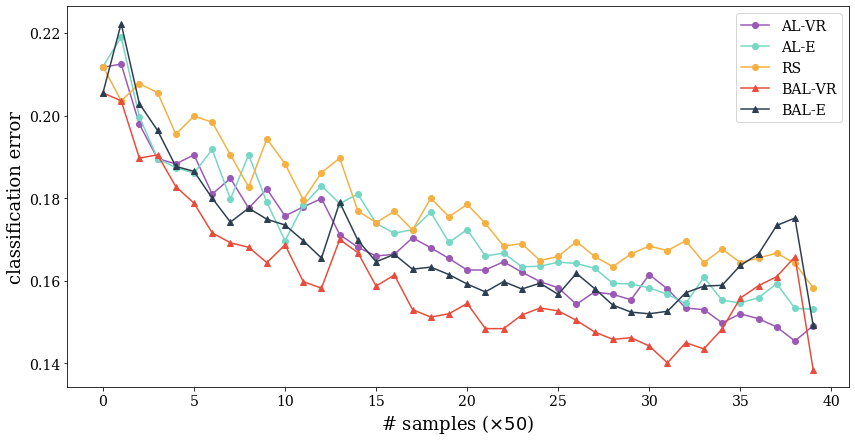

In [5]:
# 500 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results_archive/McDropout/lenet300-100_fmnist_isample500_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample500_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_c'
PlotGraph(f_name,locs,labels)

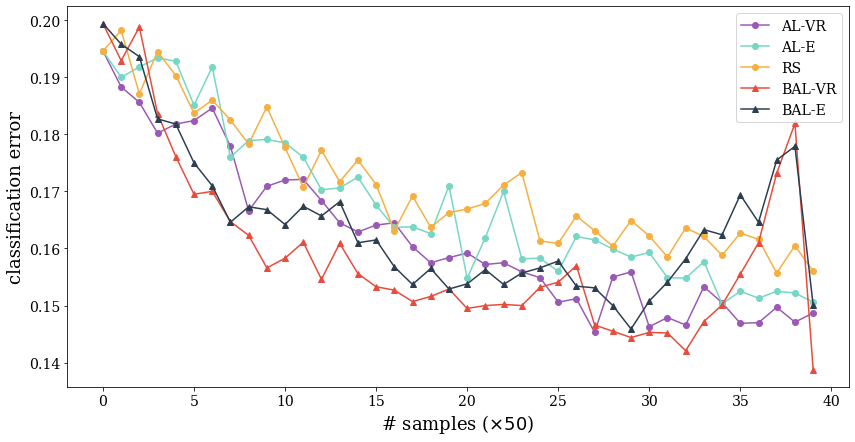

In [6]:
# 1000 initial samples
pth_1 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_variation-ratio/'
pth_2 = '../results_archive/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac1_b32_retrain0_entropy/'
pth_3 = '../results/McDropout/lenet300-100_fmnist_isample1000_e20_r40_ac0_b32_retrain0/'
# bayesian results
pth_4 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_variation-ratio_retrain0/'
pth_5 = '../results_archive/Blenet300-100_fmnist_isample1000_e15_r41_ac1_Klreg-standard2_b100_mcmc20_netType-blundell_entropy_retrain0/'
locs = [pth_1, pth_2, pth_3, pth_4,pth_5]
labels = ['AL-VR','AL-E','RS','BAL-VR','BAL-E']
f_name = 'fig_d'
PlotGraph(f_name,locs,labels)

<p>Unlike MNIST, for Fashion MNIST data, which is more challenging, Bayesian active learning with Variation-Ratio starts to outperform AL-VR and AL-E at an early stage (around th rounds on wards). However one can observe that towards round 30, <font color="red">there is a major increase in the classification error, this is because of the retraining and we need to report this in a different way.</color></p>